                  2409
Returns       0.046596
Volatility    0.079887
Sharpe Ratio  0.583272
1101 Weight   0.028277
1102 Weight   0.013797
1216 Weight   0.227396
1301 Weight   0.178414
1303 Weight   0.552116
                  1963
Returns       0.054606
Volatility    0.086914
Sharpe Ratio  0.628274
1101 Weight   0.002831
1102 Weight   0.002371
1216 Weight   0.074441
1301 Weight   0.571594
1303 Weight   0.348762


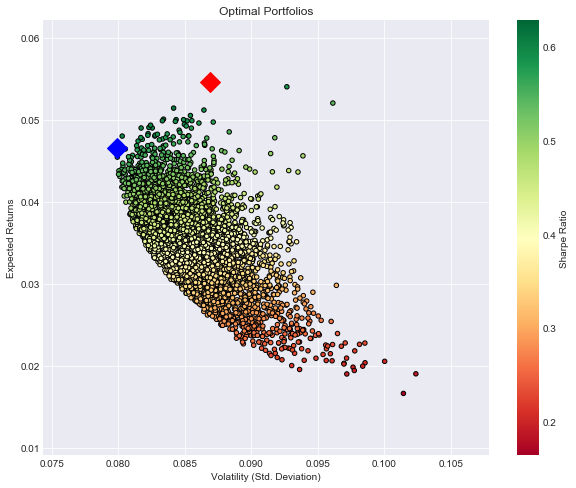

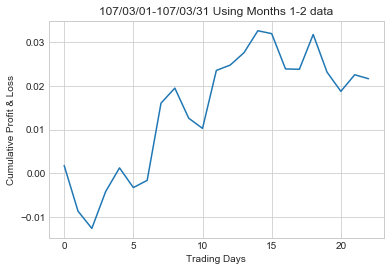

                 2409
1101 Weight  0.028277
1102 Weight  0.013797
1216 Weight  0.227396
1301 Weight  0.178414
1303 Weight  0.552116
                           0
Return Before Fees  0.019810
Return After Fees   0.013810
SD                  0.013876
                  1068
Returns       0.010621
Volatility    0.077915
Sharpe Ratio  0.136316
1101 Weight   0.098960
1102 Weight   0.003140
1216 Weight   0.127310
1301 Weight   0.171600
1303 Weight   0.598991
                  1963
Returns       0.015102
Volatility    0.085138
Sharpe Ratio  0.177381
1101 Weight   0.002831
1102 Weight   0.002371
1216 Weight   0.074441
1301 Weight   0.571594
1303 Weight   0.348762


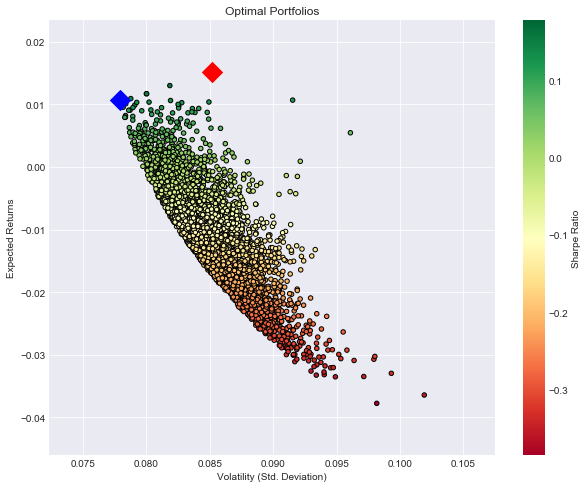

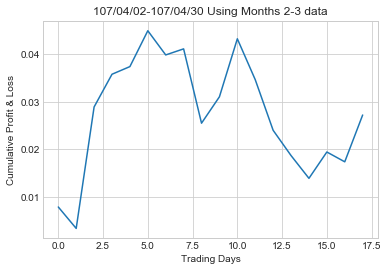

                 1068
1101 Weight  0.098960
1102 Weight  0.003140
1216 Weight  0.127310
1301 Weight  0.171600
1303 Weight  0.598991
                           0
Return Before Fees  0.019311
Return After Fees   0.013311
SD                  0.012197
                   387
Returns       0.056360
Volatility    0.047389
Sharpe Ratio  1.189308
1101 Weight   0.313039
1102 Weight   0.024538
1216 Weight   0.014470
1301 Weight   0.273131
1303 Weight   0.374821
                  1751
Returns       0.104834
Volatility    0.064690
Sharpe Ratio  1.620566
1101 Weight   0.477865
1102 Weight   0.409413
1216 Weight   0.001900
1301 Weight   0.068743
1303 Weight   0.042080


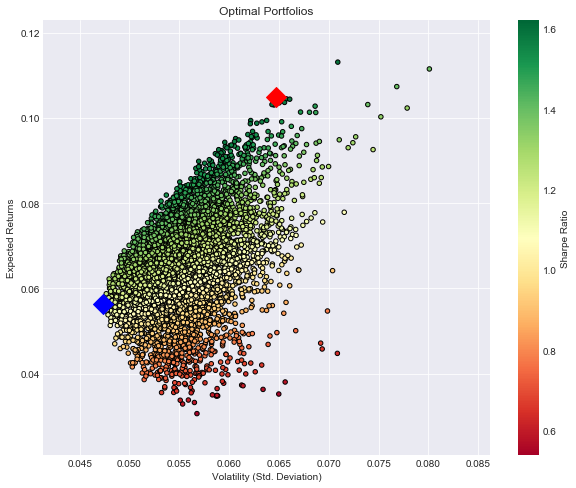

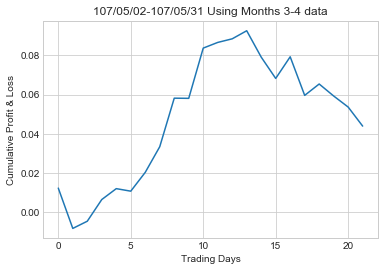

                  387
1101 Weight  0.313039
1102 Weight  0.024538
1216 Weight  0.014470
1301 Weight  0.273131
1303 Weight  0.374821
                           0
Return Before Fees  0.031685
Return After Fees   0.025685
SD                  0.032537
                  3575
Returns       0.047200
Volatility    0.086455
Sharpe Ratio  0.545948
1101 Weight   0.097296
1102 Weight   0.018601
1216 Weight   0.330385
1301 Weight   0.114243
1303 Weight   0.439475
                  1963
Returns       0.062406
Volatility    0.095328
Sharpe Ratio  0.654643
1101 Weight   0.002831
1102 Weight   0.002371
1216 Weight   0.074441
1301 Weight   0.571594
1303 Weight   0.348762


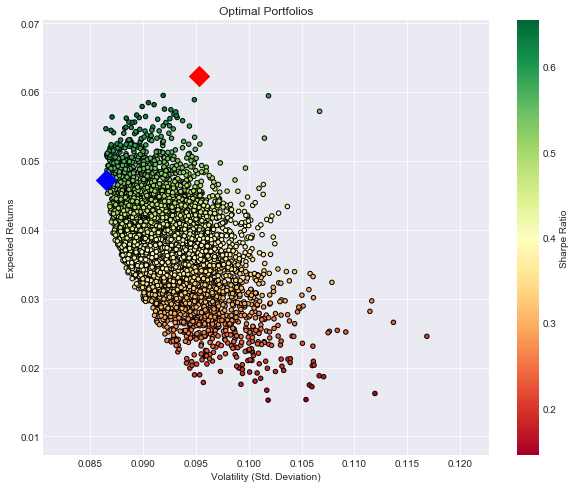

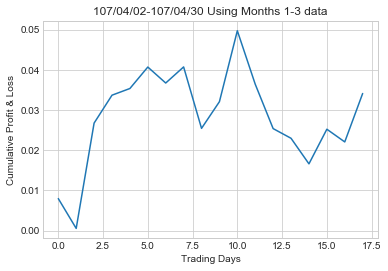

                 3575
1101 Weight  0.097296
1102 Weight  0.018601
1216 Weight  0.330385
1301 Weight  0.114243
1303 Weight  0.439475
                           0
Return Before Fees  0.026151
Return After Fees   0.020151
SD                  0.011998
                  1196
Returns       0.035944
Volatility    0.086454
Sharpe Ratio  0.415757
1101 Weight   0.210733
1102 Weight   0.011790
1216 Weight   0.081567
1301 Weight   0.177080
1303 Weight   0.518830
                  2246
Returns       0.072281
Volatility    0.105913
Sharpe Ratio  0.682451
1101 Weight   0.622861
1102 Weight   0.276142
1216 Weight   0.021555
1301 Weight   0.040523
1303 Weight   0.038919


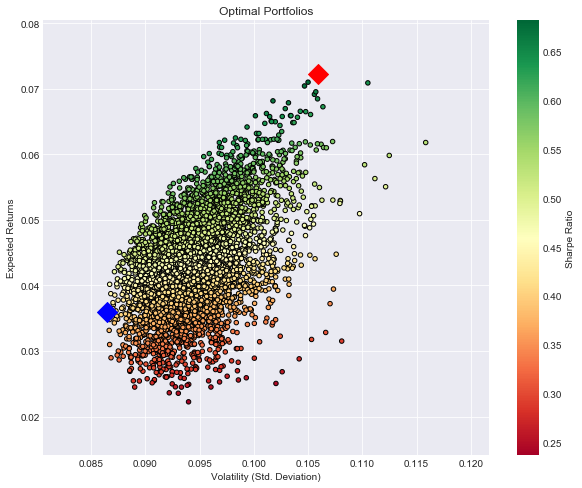

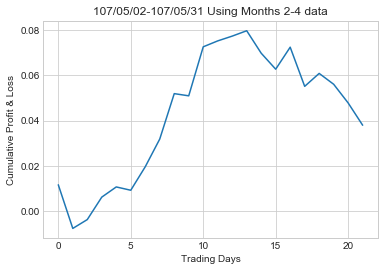

                 1196
1101 Weight  0.210733
1102 Weight  0.011790
1216 Weight  0.081567
1301 Weight  0.177080
1303 Weight  0.518830
                           0
Return Before Fees  0.026321
Return After Fees   0.020321
SD                  0.028615
                  2891
Returns       0.077030
Volatility    0.094919
Sharpe Ratio  0.811543
1101 Weight   0.165028
1102 Weight   0.006215
1216 Weight   0.156282
1301 Weight   0.245656
1303 Weight   0.426819
                  4038
Returns       0.118576
Volatility    0.116166
Sharpe Ratio  1.020743
1101 Weight   0.496833
1102 Weight   0.387242
1216 Weight   0.040881
1301 Weight   0.025525
1303 Weight   0.049519


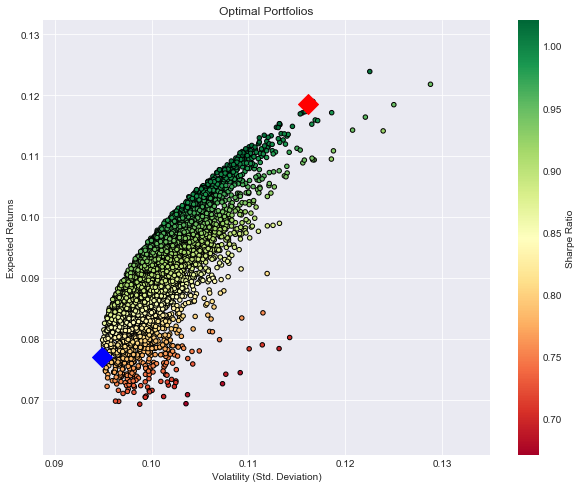

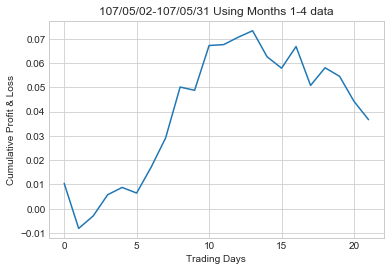

                 2891
1101 Weight  0.165028
1102 Weight  0.006215
1216 Weight  0.156282
1301 Weight  0.245656
1303 Weight  0.426819
                           0
Return Before Fees  0.026188
Return After Fees   0.020188
SD                  0.026624


In [47]:
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt

import datetime
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

# read one stock from excel and create dataframe NOTE: WITHOUT MONTH LABEL
def read_clean_stock_from_excel(stock, date_list):
    one_stock_df_list = []
    
    for date in date_list: 
        # reading from excel 
        df = pd.read_excel(str(stock)+ '-' + date[-3]+'.xlsx', sheetname=str(stock)+ '-' + date[-3])

        # dropping unwanted columns and renaming to english 
        df.drop(['成交股數', '成交金額', '最高價', '開盤價', '最低價', '漲跌價差', '成交筆數'], axis=1, inplace=True)
        df.columns=['date','closing_price']

        # Adding a column of the stock number to the dataframe 
        stock_no = []
        for i in range(len(df['date'])):
            stock_no.append(str(stock))

        df['stock_no'] = stock_no
        
        one_stock_df_list.append(df)
    
    return one_stock_df_list
    

# Make one dataframe in the returned list consist of one month's data for 5 stocks
def process_5_stocks_into_months(stock_list, date_list):
    # add dataframes to df_list
    df_list = []
    for stock in stock_list:
        df_list.append(read_clean_stock_from_excel(stock, date_list))   # df_list is now a list of list of dfs
    
    # Concat each month's stock data together and append to monthly_df_list
    monthly_df_list = [] # One df contains a months data of the 5 stocks
    m1 = []
    m2 = []
    m3 = []
    m4 = []
    m5 = []
    
    for stock in df_list:
        m1.append(stock[0])
        m2.append(stock[1])
        m3.append(stock[2])
        m4.append(stock[3])
        m5.append(stock[4])
       
    monthly_df_list.append(m1)
    monthly_df_list.append(m2)
    monthly_df_list.append(m3)
    monthly_df_list.append(m4)
    monthly_df_list.append(m5)
    
    #  concat df of different stocks for that month and put it into list 
    final_df = []
    for month in monthly_df_list:
        
        month_df = month[0]
        for i in range(1, len(month)):
            month_df = month_df.append(month[i])
            
        final_df.append(month_df)
        
    return final_df



# Finding Optimal Portfolios for single OR multiple months, returning sharpe ratio portfolio
def optimal_portfolio_mult_months(stock_list, date_list, months_in_date_list):
    
    # List of df for each month 
    final_df = process_5_stocks_into_months(stock_list, date_list)
    # Concat df of multiple months together
    months_final_df = final_df[months_in_date_list[0] - 1]  # Get info for first month in months_in_date_list
    clean = months_final_df.set_index('date')
    months_final_df = clean.pivot(index=clean.index, columns='stock_no')

    for i in range(1, len(months_in_date_list)):
        clean = final_df[months_in_date_list[i] - 1].set_index('date')
        table = clean.pivot(index=clean.index, columns='stock_no')
        months_final_df = months_final_df.append(table)
    
    # calculate daily and annual returns of the stocks
    returns_daily = months_final_df.pct_change() # Percentage change between the current and a prior element.
    returns_annual = returns_daily.mean() * len(months_final_df) #trading days
    
    # get daily and covariance of returns of the stock
    cov_daily = returns_daily.cov()
    cov_annual = cov_daily * len(months_final_df)
    
    # empty lists to store returns, volatility and weights of imaginary portfolios
    port_returns = []
    port_volatility = []
    sharpe_ratio = []
    stock_weights = []

    # set the number of combinations for imaginary portfolios
    num_assets = len(stock_list)
    num_portfolios = 5000


    #set random seed for reproduction's sake
    np.random.seed(101)


    # populate the empty lists with each portfolios returns,risk and weights
    for single_portfolio in range(num_portfolios):

        weights = np.random.random(num_assets)
        weights /= np.sum(weights)

        returns = np.dot(weights, returns_annual)

        volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights))) #SD

        rf_rate = 0.00 # risk free rate of return

        sharpe = (returns - rf_rate)/ volatility

        sharpe_ratio.append(sharpe)
        port_returns.append(returns)
        port_volatility.append(volatility)
        stock_weights.append(weights)

    # a dictionary for Returns and Risk values of each portfolio
    portfolio = {'Returns': port_returns,
                 'Volatility': port_volatility,
                 'Sharpe Ratio': sharpe_ratio}

    # extend original dictionary to accomodate each ticker and weight in the portfolio
    for counter,stock in enumerate(stock_list):
        portfolio[str(stock) + ' Weight'] = [Weight[counter] for Weight in stock_weights]

    # make a nice dataframe of the extended dictionary
    df = pd.DataFrame(portfolio)

    # get better labels for desired arrangement of columns
    column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [str(stock) + ' Weight'\
                                                                for stock in stock_list]

    # reorder dataframe columns
    df = df[column_order]

    # find min Volatility & max sharpe values in the dataframe (df)
    min_volatility = df['Volatility'].min()
    max_sharpe = df['Sharpe Ratio'].max()

    # use the min, max values to locate and create the two special portfolios
    # df.loc --> Access a group of rows and columns by label(s) or a boolean array.
    sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe] 
    min_variance_port = df.loc[df['Volatility'] == min_volatility]

    # print the details of the 2 special portfolios
    print(min_variance_port.T)
    print(sharpe_portfolio.T)

    # The most risk-averse investor would construct the minimum variance portfolio
    # which has an expected return of 11.96% with an accompanying expected volatility of 10.27%. 

    # Investors seeking the maximum risk-adjusted return would opt for portfolio that with 
    # the maximum Sharpe Ratio which has an expected return of 16.33% with expected volatility pegged at 11.68%


    # plot frontier, max sharpe & min Volatility values with a scatterplot
    plt.style.use('seaborn-dark')
    fig, ax = plt.subplots()
    df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                    cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True, ax=ax)
    plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
    plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200)
    plt.xlabel('Volatility (Std. Deviation)')
    plt.ylabel('Expected Returns')
    plt.title('Optimal Portfolios')
    plt.show()
    
    # Return Maximum Sharpe Ratio portfolio
    #return sharpe_portfolio # TESTING WITH MAX SHARPE RATIO 
    return min_variance_port # TESTING WITH MIN VOLATILITY 
    
    
    
    
# Calculate Cumulative Returns
# (Current Price of Security - Original Price of Security) / (Original Price of Security)
# SAME AS    Percentage change from initial value = (current value/initial value) - 1    
def Cumulative_Returns(stock_list, date_list, sharpe_portfolio, months_in, month_out):
    
    final_df = process_5_stocks_into_months(stock_list, date_list)
    clean = final_df[month_out - 1].set_index('date')
    table = clean.pivot(index=clean.index, columns='stock_no')
    
    CR = final_df[month_out - 1].set_index('date') # Copy table without aliasing
    # Pivot table 
    CR_table = CR.pivot(index=clean.index, columns='stock_no')
    
    # Drop closing_price header for easier deletion of columns 
    CR_table = CR_table.xs('closing_price', axis=1, drop_level=True)
    # Reset index of dataframe 
    CR_table.reset_index(inplace=True)
    # delete column dates of dataframe 
    CR_table.drop(['date'], axis=1, inplace=True)

    # Adding the Cumulative Returns to each stock
    # Percentage change from initial value = (current value/initial value) - 1
    for j in range(len(stock_list)):
        CR_table[CR_table.columns[j] +' pct_diff'] = \
        (CR_table[CR_table.columns[j]]).astype(float) / int(CR_table[CR_table.columns[j]].iat[0]) - 1

    # Removing the closing_prices columns
    for stock in stock_list:
        CR_table.drop([str(stock)], axis=1, inplace=True)

    # Using weights from Maximum Sharpe Ratio 
    # Remove unwanted rows from optimal Sharpe_portfolio
    sharpe_p = sharpe_portfolio.copy()
    sharpe_p.drop(['Returns', 'Volatility', 'Sharpe Ratio'], axis=1, inplace=True)
    
    # Create list of weights 
    sharpe_list = sharpe_p.as_matrix()[0]
    
    # Create list of column names
    pct_diff_stock_list = []
    for stock in stock_list:
        pct_diff_stock_list.append(str(stock) + ' pct_diff')

    # Multiple by the portfolio's weights to get sum of profits/losses for that day  
    CR_table['sharpe_weighted'] = CR_table[pct_diff_stock_list].mul(sharpe_list).sum(1) # axis=1 


    # Plotting Performance Chart: x-axis is dates, y-axis is returns
    # Plot Cumulative Profit and Loss vs Trading Days   
    # print(plt.style.available) <-- to check styles available for graph 
    plt.style.use('seaborn-whitegrid')
    fig, ax = plt.subplots()
    ax.plot(CR_table.index, CR_table['sharpe_weighted'])
    plt.xlabel('Trading Days')
    plt.ylabel('Cumulative Profit & Loss')
    plt.title(str(table.index[0]) + '-' + str(table.index[-1] + ' Using Months ' + months_in + ' data'))
    plt.show() 

    print(sharpe_p.T)

    # Create dataframe to show return and SD for max_sharpe portfolio
    sharpe_rtn = (CR_table['sharpe_weighted'][len(CR_table['sharpe_weighted'])-1] - CR_table['sharpe_weighted'][0])
    sharpe_rtn_after_fees = (CR_table['sharpe_weighted'][len(CR_table['sharpe_weighted'])-1] \
                             - CR_table['sharpe_weighted'][0]) - 0.006 # subtract fees
    sharpe_std = CR_table['sharpe_weighted'].std()
    sharpe_mean_SD = pd.DataFrame([sharpe_rtn, sharpe_rtn_after_fees, sharpe_std], index = \
                                  ['Return Before Fees', 'Return After Fees', 'SD'])
    print(sharpe_mean_SD)
    


def main():
    stock_list = [1101, 1102, 1216, 1301, 1303]
    date_list = ['20180101', '20180201', '20180301', '20180401', '20180501']
    
    # TWO MONTHS IN 
    # Using months 1-2 to predict month 3 
    months_in_date_list = [1, 2] # January = 1, Febuary = 2, etc...
    months_in = str(months_in_date_list[0]) + '-' + str(months_in_date_list[-1])
    month_out = 3
    sharpe_portfolio = optimal_portfolio_mult_months(stock_list, date_list, months_in_date_list)
    Cumulative_Returns(stock_list, date_list, sharpe_portfolio, months_in, month_out)
    
    # Using months 2-3 to predict month 4 
    months_in_date_list = [2, 3] # January = 1, Febuary = 2, etc...
    months_in = str(months_in_date_list[0]) + '-' + str(months_in_date_list[-1])
    month_out = 4
    sharpe_portfolio = optimal_portfolio_mult_months(stock_list, date_list, months_in_date_list)
    Cumulative_Returns(stock_list, date_list, sharpe_portfolio, months_in, month_out)
    
    # Using months 3-4 to predict month 5
    months_in_date_list = [3, 4] # January = 1, Febuary = 2, etc...
    months_in = str(months_in_date_list[0]) + '-' + str(months_in_date_list[-1])
    month_out = 5
    sharpe_portfolio = optimal_portfolio_mult_months(stock_list, date_list, months_in_date_list)
    Cumulative_Returns(stock_list, date_list, sharpe_portfolio, months_in, month_out)
    
    
    
    # THREE MONTHS IN 
    # Using months 1-3 to predict month 4
    months_in_date_list = [1, 2, 3] # January = 1, Febuary = 2, etc...
    months_in = str(months_in_date_list[0]) + '-' + str(months_in_date_list[-1])
    month_out = 4
    sharpe_portfolio = optimal_portfolio_mult_months(stock_list, date_list, months_in_date_list)
    Cumulative_Returns(stock_list, date_list, sharpe_portfolio, months_in, month_out)
    
    # Using months 2-4 to predict month 5
    months_in_date_list = [2, 3, 4] # January = 1, Febuary = 2, etc...
    months_in = str(months_in_date_list[0]) + '-' + str(months_in_date_list[-1])
    month_out = 5
    sharpe_portfolio = optimal_portfolio_mult_months(stock_list, date_list, months_in_date_list)
    Cumulative_Returns(stock_list, date_list, sharpe_portfolio, months_in, month_out)
    
    
    
    # FOUR MONTHS IN 
    # Using months 1-4 to predict month 5
    months_in_date_list = [1, 2, 3, 4] # January = 1, Febuary = 2, etc...
    months_in = str(months_in_date_list[0]) + '-' + str(months_in_date_list[-1])
    month_out = 5
    sharpe_portfolio = optimal_portfolio_mult_months(stock_list, date_list, months_in_date_list)
    Cumulative_Returns(stock_list, date_list, sharpe_portfolio, months_in, month_out)
    

    
    
main()




